# Encoder

## Índice

- [Preparando o ambiente](#prep)
- [Inicializando o encoder](#inic)
    - [Gerando os sinais](#ger)
    - [Gráficos](#graficos)
        - [Sinais no tempo](#tempo)
        - [Sinais somados no tempo](#tempo1)
        - [Transformada de Fourier](#fourier)
- [Gerando arquivo .wav](#wav)

<div id="prep"></div>

___

## Preparando o ambiente


In [1]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import struct
import peakutils

# para salvar em .wav
from scipy.io.wavfile import write

### Definindo funções a serem utilizadas

In [2]:
def signal_handler(signal, frame):
    print('You pressed Ctrl+C!')
    sys.exit(0)

#converte intensidade em Db, caso queiram ...
def todB(s):
    sdB = 10*np.log10(s)
    return(sdB)

### Definindo parâmetros e diconário de frequências

In [3]:
#definindo os parametros + dicionario
signal = signalMeu() 
fs = 44100 # sample rate - taxa de amostragem
amplitude = 100
time = 3 #tempo 
numbers = {"1":[1209,697],
"2": [1336,697],
"3": [1477,697],
"A": [1633,697],
"4": [1209,770],
"5": [1336,770],
"6": [1477,770],
"B": [1633,770],
"7": [1209,852],
"8": [1336,852],
"9": [1477,852],
"C": [1633,852],
"X": [1209,941],
"0": [1336,941],
"#": [1477,941],
"D": [1633,941],
}

<div id="inic"></div>

___

## Inicializando o encoder

In [4]:
print("Inicializando encoder...\n")
number = input("Escolha um número entre 0 a 9: ")

Inicializando encoder...

Escolha um número entre 0 a 9: 5


<div id="ger"></div>

### Gerando os sinais

A partir do input do usuário serão geradas duas senóides de acordo com as frequências do número escolhido

In [5]:
print("Gerando Tons base...\n")
freq1 = int(numbers[number][0])
freq2 = int(numbers[number][1])
x1, s1 = signalMeu.generateSin(0,freq1, amplitude, time, fs)
x2, s2 = signalMeu.generateSin(0,freq2, amplitude, time, fs)

soma = s1+s2

print("Executando as senoides (emitindo o som) . . .")
print(f"Gerando Tom referente ao símbolo : {number}")
print(f"Frequencias: {freq1} + {freq2}")
sd.play(soma, fs)
sd.wait() # aguarda fim do audio

Gerando Tons base...

Executando as senoides (emitindo o som) . . .
Gerando Tom referente ao símbolo : 5
Frequencias: 1336 + 770


<div id="graficos"></div>

### Gerando os gráficos

<div id="tempo"></div>

#### Sinal no tempo
Abaixo é possível observar o comportamento das duas senóides no tempo. 

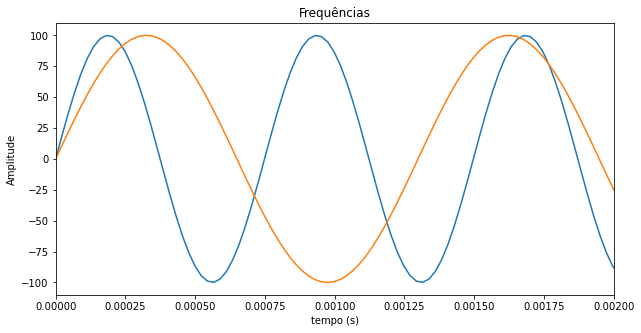

In [6]:
#Senoides
maxt=(2*1e-3)
fig = plt.figure(figsize=(10, 5))
plt.xlim([0, maxt])
plt.plot(x1,s1)
plt.plot(x2,s2)
plt.xlabel("tempo (s)")
plt.ylabel("Amplitude")
plt.title('Frequências')

plt.show()

<div id="tempo1"></div>

#### Sinais somados no tempo
Ao somar as duas senóides, é possível observar o seguinte resultado da soma no tempo

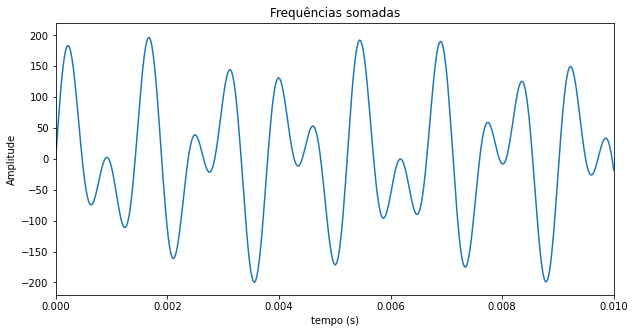

In [7]:
#Senoides somadas
maxt=(1e-2)
fig = plt.figure(figsize=(10, 5))
plt.xlim([0, maxt])
plt.plot(x1,soma)
plt.xlabel("tempo (s)")
plt.ylabel("Amplitude")
plt.title('Frequências somadas')

plt.show()

<div id="fourier"></div>

#### Transformada de fourier

Observe acima que o gráfico da soma das senóides no tempo não nos traz informações muito interessantes. Assim, para extrair informações mais úteis podemos utilizar a Transformada de Fourier, que ira pegar o sinal no dominio do tempo e irá transformá-lo em um espectro no dominio das frequencias. Desta forma, podemos ter uma melhor visualização, e assim extrair as frequencias correspondentes ao numero escolhido

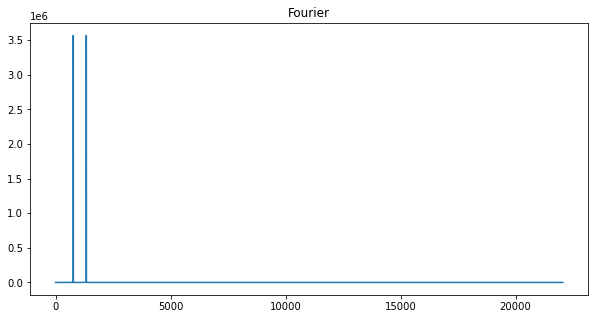

In [8]:
# Fourier
fig = plt.figure(figsize=(10, 5))
x,y = signal.calcFFT(soma, fs)
plt.plot(x, np.abs(y))
plt.title('Fourier')
plt.show()

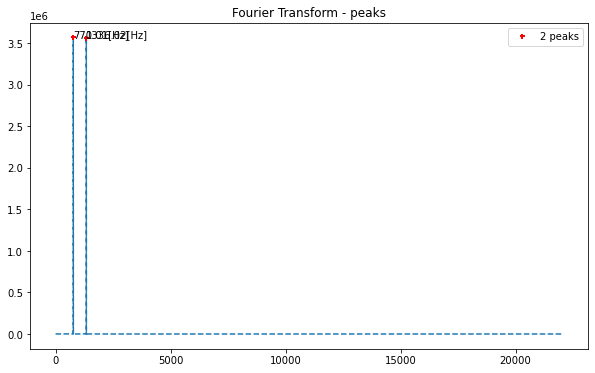

In [9]:
index = peakutils.indexes(y, thres=0.1, min_dist=1000)
signal.plot_fourier_peaks(x,y,index)

<div id="wav"></div>

## Guardando o sinal gerado em um arquivo .wav

Guardaremos o sinal gerado em um arquivo .wav para poder ser executado pelo arquivo `decode.ipynb`

In [10]:
write('audio/input.wav', fs, soma)